### IDs:
Insert yours IDs to the cell below

ID #1: 316298876

ID #2: 316298256


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from scipy.special import binom

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [ ]:
def a(prob_target: float, prob_defective: float) -> int:
    prob_good = 1 - prob_defective
    prob_inverse_target = 1 - prob_target
    n = 1
    while True:
        if np.power(prob_good, n) <= prob_inverse_target:
            return n
        n += 1

In [ ]:
def a_v2(prob_target: float, prob_defective: float) -> int:
    return int(np.ceil(math.log(1 - prob_target, 1 - prob_defective)))

In [ ]:
print(a(prob_target=0.85, prob_defective=0.03))
print('-'* 10)
print(a_v2(prob_target=0.85, prob_defective=0.03))

63
----------
63


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [ ]:
print(a(prob_target=0.95, prob_defective=0.04))
print('-'* 10)
print(a_v2(prob_target=0.95, prob_defective=0.04))

74
----------
74


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [ ]:
def _plot(arr, target_defects):
    x = [i[0] for i in arr]
    y = [i[1] for i in arr]
    plt.plot(x, y)
    plt.title(f"{target_defects} at least defectives")
    plt.show()

In [ ]:
def c(target_prob: float, prob_defective: float, target_defects: int):
    prob_good = 1 - prob_defective
    n = target_defects
    
    arr = []
    while True:
        overall = 0

        for defects in range(target_defects):
            non_defects = n - defects
            overall += binom(n, defects) * (np.power(prob_defective, defects)) * (np.power(prob_good, non_defects))

        arr.append([n, 1 - overall])
        if 1 - overall > target_prob:
            _plot(arr, target_defects)
            return n
        n += 1

    return n

In [ ]:
def c_v2(target_prob: float, prob_defective: float, target_defects: int):
    return nbinom.ppf(q=target_prob, n=target_defects, p=prob_defective) + target_defects

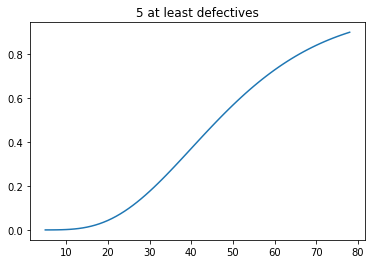

78
78.0
----------


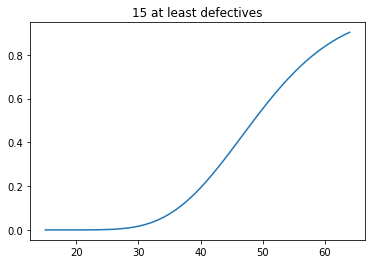

64
64.0


In [ ]:
print(c(0.9, 0.1, 5))
print(c_v2(0.9, 0.1, 5))
print('-'* 10)
print(c(0.9, 0.3, 15))
print(c_v2(0.9, 0.3, 15))

Explanation:

If we calculate the mean of each distribution (the mean of NBinom distribution is: $\frac{r}{p}$), we can see they both equal so we need to find something else that makes the difference between the distributions, $\frac{5}{0.1} = 50$ equal to  $\frac{15}{0.3} = 50$

We will look into the variance of each distribution ($\frac{r(1-p)}{p^2}$)

5 at least defectives: $\frac{5(1-0.1)}{0.1^2} = 450$

15 at least defectives $\frac{15(1-0.3)}{0.1^2} = 166\frac{2}{3}$

As we can see in the first graph and in our variances results more mass go to the extreme so we will need to order more items to reach $90\%$.


### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

In [ ]:
def add_iqr(dist: np.ndarray, median):
    dist_sort = np.sort(dist)
    mid_point = int(len(dist_sort) / 2)

    i = mid_point
    while dist_sort[i] == median:
        i += 1

    group_size = int((len(dist_sort) - i) / 2) - 10

    is_valid_move = np.any(dist_sort[i: i + group_size] - 500 < median)
    if not is_valid_move:
        dist_sort[i: i + group_size] -= 500
        dist_sort[i + group_size:] += 500

    return dist_sort

In [ ]:
def reduce_iqr(dist: np.ndarray, median):
    dist_sort = np.sort(dist)
    mid_point = int(len(dist_sort) / 2)

    i = mid_point
    while dist_sort[i] == median:
        i += 1

    group_size = int((len(dist_sort) - i) / 3) - 1

    is_valid_move = np.any(dist_sort[i: i + (group_size * 2)] - 500 < median)
    if not is_valid_move:
        dist_sort[i: i + (group_size * 2)] -= 500
        dist_sort[i + (group_size * 2):i + (group_size * 3)] += 1000

    return dist_sort

In [ ]:
def make_more_bins(arr: np.ndarray) -> np.ndarray:
    distri = arr.copy()
    group_size = int(len(distri) * 0.2 / 8)
    distri[:group_size] -= 400
    distri[group_size: group_size * 2] += 400
    distri[group_size * 2: group_size * 5] -= 200
    distri[group_size * 5: group_size * 7] += 200

    idx = int(len(distri) * 0.8)
    distri[idx:idx + group_size] -= 400
    distri[idx + group_size: idx + (group_size * 2)] += 400
    distri[idx + (group_size * 2):idx + (group_size * 5)] -= 200
    distri[idx + (group_size * 5):idx + (group_size * 7)] += 200

    return distri

In [ ]:
def build_distribution(pop, mean, median) -> np.ndarray:
    distri = np.zeros(pop, dtype=np.int32)

    med_point = int(pop / 2)
    distri[med_point - 1: med_point + 2] = median

    _min = (int(min(mean, median) / 4 / 100)) * 100

    num_ran = 0
    while num_ran == 0:
        num_ran = int(random.randint(1, _min) / 100) * 100

    num_ran = max(num_ran, 500)

    distri[: med_point - 1] = num_ran

    result = ((mean * pop) - np.sum(distri)) / (pop - np.count_nonzero(distri))

    distri[med_point + 2:] = result

    return distri


In [ ]:
def build_distributions(sh_pop: int, sh_mean: int, sh_median: int, rg_pop: int, rg_mean: int, rg_median: int) -> (
        np.ndarray, np.ndarray):
    sh_dist = build_distribution(sh_pop, sh_mean, sh_median)
    sh_iqr = np.percentile(sh_dist, 75) - np.percentile(sh_dist, 25)

    rg_dist = build_distribution(rg_pop, rg_mean, rg_median)
    rg_iqr = np.percentile(rg_dist, 75) - np.percentile(rg_dist, 25)

    counter = 0
    while rg_iqr < sh_iqr:
        counter += 1
        if counter == 1000:
            return build_distributions(sh_pop, sh_mean, sh_median, rg_pop, rg_mean, rg_median)

        rg_dist = add_iqr(rg_dist, rg_median)
        rg_iqr = np.percentile(rg_dist, 75) - np.percentile(rg_dist, 25)

        sh_dist = reduce_iqr(sh_dist, sh_median)
        sh_iqr = np.percentile(sh_dist, 75) - np.percentile(sh_dist, 25)

    sh_dist = make_more_bins(sh_dist)
    rg_dist = make_more_bins(rg_dist)

    rg_iqr = np.percentile(rg_dist, 75) - np.percentile(rg_dist, 25)
    sh_iqr = np.percentile(sh_dist, 75) - np.percentile(sh_dist, 25)
    sh_var = np.var(sh_dist)
    rg_var = np.var(rg_dist)

    if rg_iqr < sh_iqr or rg_var > sh_var:
        return build_distributions(sh_pop, sh_mean, sh_median, rg_pop, rg_mean, rg_median)

    return sh_dist, rg_dist

In [ ]:
def plot_rents(sh_dist: np.ndarray, rg_dist: np.ndarray):
    sh_mean = np.round(np.mean(sh_dist))
    sh_median = np.round(np.median(sh_dist))
    sh_iqr = np.percentile(sh_dist, 75) - np.percentile(sh_dist, 25)
    sh_var = np.round(np.var(sh_dist))
    sh_title = f"SH\nPopulation: {len(sh_dist)}\nmean: {sh_mean}" \
               f"\nmedian: {sh_median}\nIQR: {sh_iqr}\nVariance: {sh_var}"
    sh_bins = int(np.max(sh_dist) / 100) + 2
    plt.hist(sh_dist, bins=[i * 100 for i in range(sh_bins)])
    plt.title(sh_title)
    plt.show()
    
    rg_mean = np.round(np.mean(rg_dist))
    rg_median = np.round(np.median(rg_dist))
    rg_iqr = np.percentile(rg_dist, 75) - np.percentile(rg_dist, 25)
    rg_var = np.round(np.var(rg_dist))
    rg_title = f"RG\nPopulation: {len(rg_dist)}\nmean: {rg_mean}" \
               f"\nmedian: {rg_median}\nIQR: {rg_iqr}\nVariance: {rg_var}"
    rg_bins = int(np.max(rg_dist) / 100) + 2
    plt.hist(rg_dist, bins=[i * 100 for i in range(rg_bins)])
    plt.title(rg_title)
    plt.show()
    

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

2.A and 2.B together down below 2.B

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

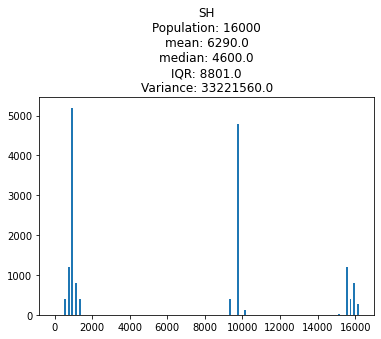

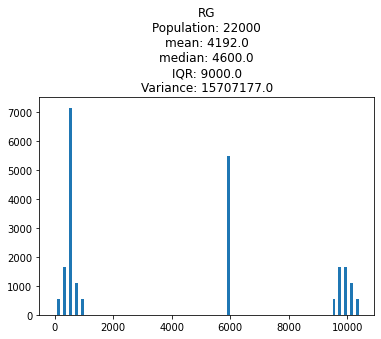

In [ ]:
sh_rent_dist, rg_rent_dist = build_distributions(sh_pop=16000, sh_mean=6300, sh_median=4600,
                                                     rg_pop=22000, rg_mean=4200, rg_median=4600)

plot_rents(sh_rent_dist, rg_rent_dist)

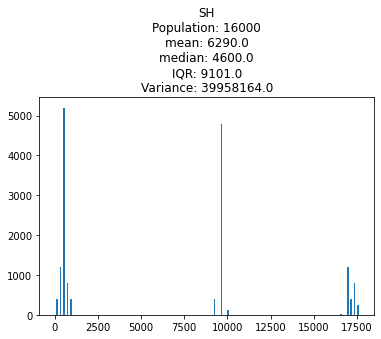

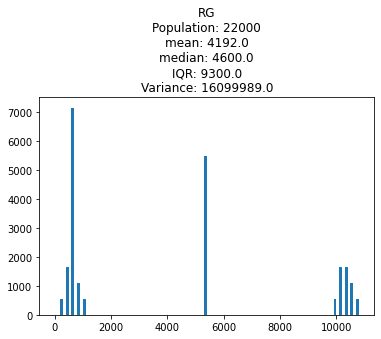

In [ ]:
sh_rent_dist, rg_rent_dist = build_distributions(sh_pop=16000, sh_mean=6300, sh_median=4600,
                                                     rg_pop=22000, rg_mean=4200, rg_median=4600)

plot_rents(sh_rent_dist, rg_rent_dist)

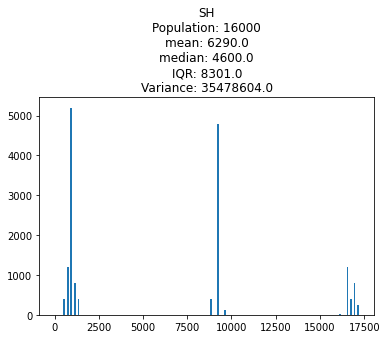

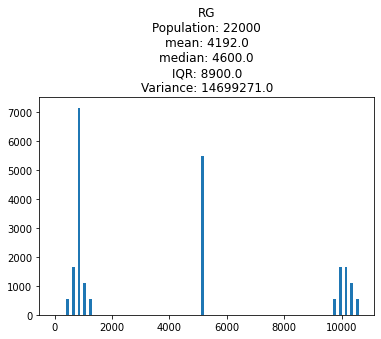

In [ ]:
sh_rent_dist, rg_rent_dist = build_distributions(sh_pop=16000, sh_mean=6300, sh_median=4600,
                                                     rg_pop=22000, rg_mean=4200, rg_median=4600)

plot_rents(sh_rent_dist, rg_rent_dist)

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [ ]:
def fix_phi_distributions(rent_dist: np.ndarray, phi_dist: np.ndarray, target: float, alpha: float) -> np.ndarray:
    distri = phi_dist.copy()
    cov = alpha * (np.sqrt(np.var(rent_dist))) * (np.sqrt(np.var(distri)))
    real_cov = np.cov(rent_dist, distri)[0, 1]
    res = cov / real_cov

    median = np.median(distri)

    counter = 0
    while res < target:
        counter += 1

        if counter == 100:
            return None

        distri = reduce_iqr(distri, median)
        distri = add_iqr(distri, median)
        cov = alpha * (np.sqrt(np.var(rent_dist))) * (np.sqrt(np.var(distri)))
        real_cov = np.cov(rent_dist, distri)[0, 1]
        res = cov / real_cov

    if res > 1.0:
        return None

    return distri

In [ ]:
def build_phi_distributions(sh_rent_dist: np.ndarray, rg_rent_dist: np.ndarray) -> np.ndarray:
    sh_phi_dist, rg_phi_dist = build_distributions(sh_pop=16000, sh_mean=12500, sh_median=12000,
                                                   rg_pop=22000, rg_mean=8500, rg_median=8000)

    sh_phi_dist = fix_phi_distributions(sh_rent_dist, sh_phi_dist, 0.99, 0.97)
    rg_phi_dist = fix_phi_distributions(rg_rent_dist, rg_phi_dist, 0.99, 0.89)

    if sh_phi_dist is None or rg_phi_dist is None:
        return build_phi_distributions(sh_rent_dist, rg_rent_dist)

    return sh_phi_dist, rg_phi_dist

SH accuracy: 0.9972733465621246
RG accuracy: 0.9902296791382413


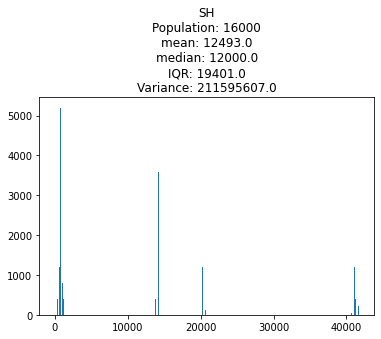

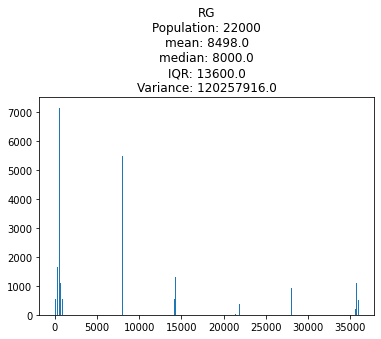

In [ ]:
sh_rent_dist, rg_rent_dist = build_distributions(sh_pop=16000, sh_mean=6300, sh_median=4600,
                                                     rg_pop=22000, rg_mean=4200, rg_median=4600)


sh_phi_dist, rg_phi_dist = build_phi_distributions(sh_rent_dist, rg_rent_dist)

sh_cov = 0.97 * (np.sqrt(np.var(sh_rent_dist))) * (np.sqrt(np.var(sh_phi_dist)))
sh_real_cov = np.cov(sh_rent_dist, sh_phi_dist)

rg_cov = 0.89 * (np.sqrt(np.var(rg_rent_dist))) * (np.sqrt(np.var(rg_phi_dist)))
rg_real_cov = np.cov(rg_rent_dist, rg_phi_dist)

print("SH accuracy:", sh_cov / sh_real_cov[0, 1])
print("RG accuracy:", rg_cov / rg_real_cov[0, 1])

plot_rents(sh_phi_dist, rg_phi_dist)

#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

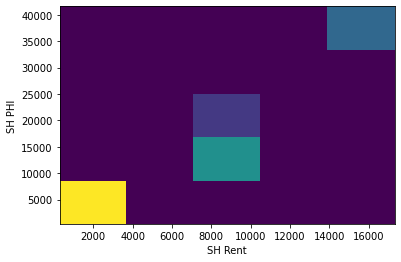

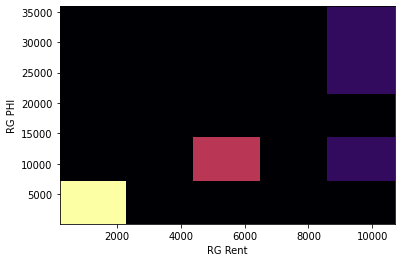

In [ ]:
plt.hist2d(x=sh_rent_dist, y=sh_phi_dist, cmap='viridis', bins=5)
plt.xlabel('SH Rent')
plt.ylabel('SH PHI')
plt.show()

plt.hist2d(x=rg_rent_dist, y=rg_phi_dist, cmap='inferno', bins=5)
plt.xlabel('RG Rent')
plt.ylabel('RG PHI')
plt.show()

### Question 3 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

$V(X + Y + Z) = E\left[(X + Y + Z)^2\right] - (E\left[X + Y + Z\right])^2 =$

$E\left[X^2\right] + E\left[Y^2\right] + E\left[Z^2\right] + 2E\left[XY\right] + 2E\left[YZ\right] + 2E\left[XZ\right] - \{(E\left[X\right])^2 + (E\left[Y\right])^2 + (E\left[Z\right])^2 + 2E\left[X\right]E\left[Y\right] + 2E\left[Y\right]E\left[Z\right] + 2E\left[X\right]E\left[Z\right] \}=$

$V\left[X\right] + V\left[Y\right] + V\left[Z\right] + 2(E\left[XY\right] - E\left[X\right]E\left[Y\right]) + 2(E\left[YZ\right] - E\left[Y\right]E\left[Z\right]) + 2(E\left[YZ\right] - E\left[Y\right]E\left[Z\right])=$

$V\left[X\right] + V\left[Y\right] + V\left[Z\right] + 2COV\left[X,Y\right] + 2COV\left[Y,Z\right] + 2COV\left[X,Z\right]$

If random variables are pairwise independent then $Cov\left[X_1, X_2\right]=0$ so in our case:
$V(X + Y + Z) = V\left[X\right] + V\left[Y\right] + V\left[Z\right]$

If not every random variable is independent, then the linearity of variances is work only on the independent pairs.
Let's say $Cov\left[X, Y\right]=0$ and $Cov\left[Y, Z\right]=0$

Then in our case:

$V(X + Y + Z) = V\left[X\right] + V\left[Y\right] + V\left[Z\right] + 2COV\left[X,Z\right]$


### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [ ]:
def NFoldConv(P, n):
    distri = {}
    if n == 0:
        return {}
    if n == 1:
        for i in range(len(P[0])):
            distri[P[0][i]] = P[1][i]
        return distri

    new_distri = NFoldConv(P, n - 1)

    for i in new_distri:
        for j in range(len(P[0])):
            if P[0][j] + i not in distri:
                distri[P[0][j] + i] = new_distri[i] * P[1][j]
            else:
                distri[P[0][j] + i] += new_distri[i] * P[1][j]
    return distri

#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [ ]:
sides = 8
NFoldConv([[i for i in range(1, sides + 1)], [1.0 / sides for i in range(sides)]], 17)

{17: 4.440892098500626e-16,
 18: 7.549516567451064e-15,
 19: 6.794564910705958e-14,
 20: 4.303224443447107e-13,
 21: 2.1516122217235534e-12,
 22: 9.036771331238924e-12,
 23: 3.313482821454272e-11,
 24: 1.088715784192118e-10,
 25: 3.2660718574106795e-10,
 26: 9.07134811711785e-10,
 27: 2.3577291230481023e-09,
 28: 5.782673007104222e-09,
 29: 1.3473395732432891e-08,
 30: 2.998400727705075e-08,
 31: 6.401734875538523e-08,
 32: 1.3161584089260714e-07,
 33: 2.613809253482202e-07,
 34: 5.027422242953605e-07,
 35: 9.38663699212583e-07,
 36: 1.7045993589981379e-06,
 37: 3.015970226893927e-06,
 38: 5.206881849684208e-06,
 39: 8.783168114145923e-06,
 40: 1.449303744882613e-05,
 41: 2.3418493098503745e-05,
 42: 3.7090165106334894e-05,
 43: 5.762708941681183e-05,
 44: 8.790117605705916e-05,
 45: 0.00013172354057466862,
 46: 0.0001940465160554794,
 47: 0.000281171099826949,
 48: 0.00040094502474907756,
 49: 0.0005629319236253316,
 50: 0.0007785276598544222,
 51: 0.0010609964316725673,
 52: 0.001425

#### 4.C
Assume that the price of a stock changes in any given day according to (in NIS):

$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.3 & 0.15 & 0.15 & 0.15 & 0.25
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

In [ ]:
NFoldConv([[-1,0,1,2,3],[0.3,0.15,0.15,0.15,0.25]], 2)

{-2: 0.09,
 -1: 0.09,
 0: 0.1125,
 1: 0.135,
 2: 0.21749999999999997,
 3: 0.12,
 4: 0.0975,
 5: 0.075,
 6: 0.0625}

In [ ]:
NFoldConv([[-1,0,1,2,3],[0.3,0.15,0.15,0.15,0.25]], 5)

{-5: 0.00243,
 -4: 0.006075,
 -3: 0.012149999999999998,
 -2: 0.021262499999999997,
 -1: 0.038221874999999995,
 0: 0.053738437499999986,
 1: 0.07074843749999998,
 2: 0.08720156249999998,
 3: 0.10407656249999997,
 4: 0.10719843749999998,
 5: 0.10638843749999999,
 6: 0.09968906249999998,
 7: 0.08860781249999998,
 8: 0.0683578125,
 9: 0.0517078125,
 10: 0.0363571875,
 11: 0.0233671875,
 12: 0.0120703125,
 13: 0.0064453125,
 14: 0.0029296875,
 15: 0.0009765625}

2. What is the probability that the stock has gained strictly more than 7NIS after 5 days? Has lost strictly more than 4NIS? Explain your answers.

In [ ]:
Q = NFoldConv([[-1,0,1,2,3],[0.3,0.15,0.15,0.15,0.25]], 5)
prob = 0
for i in Q:
    if i > 7:
        prob += Q[i]
prob

0.202211875

If the stock gained more than 7 NIS therefore the stock gained 8, 9, 10, ..., 15 NIS, so we need just to sum all the probabilities from 8 to 15.

In [ ]:
Q = NFoldConv([[-1,0,1,2,3],[0.3,0.15,0.15,0.15,0.25]], 5)
prob = 0
for i in Q:
    if i < -4:
        prob += Q[i]
prob



0.00243

We have only 1 option that the stock lost all 5 days -1. ($0.3^5$)